In [104]:
import sys

assert sys.version_info >= (3, 7)

In [105]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [106]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [107]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [108]:
import pandas as pd

In [109]:
car_data = pd.read_csv('car_evaluation.csv')

In [110]:
car_data

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [111]:
car_data['buying price'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [112]:
car_data['maintenance cost'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [113]:
car_data['number of doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [114]:
car_data['number of persons'].unique()

array(['2', '4', 'more'], dtype=object)

In [115]:
car_data['lug_boot'].unique()

array(['small', 'med', 'big'], dtype=object)

In [116]:
car_data['safety'].unique()

array(['low', 'med', 'high'], dtype=object)

In [117]:
def convert_price_and_cost(x):
    if x == 'low':
        return 0
    elif x == 'med':
        return 1
    elif x == 'high':
        return 2
    else:
        return 3

In [118]:
car_data['buy_price'] = car_data['buying price'].apply(convert_price_and_cost)

In [119]:
car_data

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision,buy_price
0,vhigh,vhigh,2,2,small,low,unacc,3
1,vhigh,vhigh,2,2,small,med,unacc,3
2,vhigh,vhigh,2,2,small,high,unacc,3
3,vhigh,vhigh,2,2,med,low,unacc,3
4,vhigh,vhigh,2,2,med,med,unacc,3
...,...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good,0
1724,low,low,5more,more,med,high,vgood,0
1725,low,low,5more,more,big,low,unacc,0
1726,low,low,5more,more,big,med,good,0


In [120]:
car_data['maintanence_cost'] = car_data['maintenance cost'].apply(convert_price_and_cost)

In [121]:
def convert_doors(x):
    if x == '2':
        return 0
    elif x == '3':
        return 1
    elif x == '4':
        return 2
    else:
        return 3

In [122]:
car_data['num_doors'] = car_data['number of doors'].apply(convert_doors)

In [123]:
def convert_num_of_persons(x):
    if x == '2':
        return 0
    elif x == '4':
        return 1
    else:
        return 2

In [124]:
car_data['num_persons'] = car_data['number of persons'].apply(convert_num_of_persons)

In [125]:
def convert_leg_boots(x):
    if x == 'small':
        return 0
    elif x == 'med':
        return 1
    else:
        return 2

In [126]:
car_data['lug_boot_ord'] = car_data['lug_boot'].apply(convert_leg_boots)

In [127]:
def convert_safety(x):
    if x == 'low':
        return 0
    elif x == 'med':
        return 1
    else:
        return 2

In [128]:
car_data['safety_convert'] = car_data['safety'].apply(convert_safety)

In [129]:
car_data_numerical_x = car_data.drop(['buying price', 'maintenance cost', 'number of doors', 'number of persons', 
                                      'lug_boot', 'safety', 'decision'], axis=1)

In [130]:
car_data_categorical_x = car_data.drop(['decision', 'buy_price', 'maintanence_cost',
                                        'num_doors', 'num_persons', 'lug_boot_ord', 'safety_convert'], axis=1)

In [131]:
car_data_y = car_data['decision']

In [132]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(car_data_numerical_x)
y = car_data_y


In [102]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt


In [30]:
classifiers = [
    ("KNN", KNeighborsClassifier(), {"n_neighbors": [3, 5, 7]}),
    ("Decision Tree", DecisionTreeClassifier(), {"max_depth": [None, 5, 10, 15]}),
    ("Logistic Regression", LogisticRegression(), {"C": [0.001, 0.01, 0.1, 1, 10]}),
    ("Naive Bayes", GaussianNB(), {}),
    ("SVM", SVC(probability=True), {"C": [0.001, 0.01, 0.1, 1, 10], "kernel": ["linear", "rbf"]}),
]


In [31]:
best_models = []
best_params = []
best_performances = []

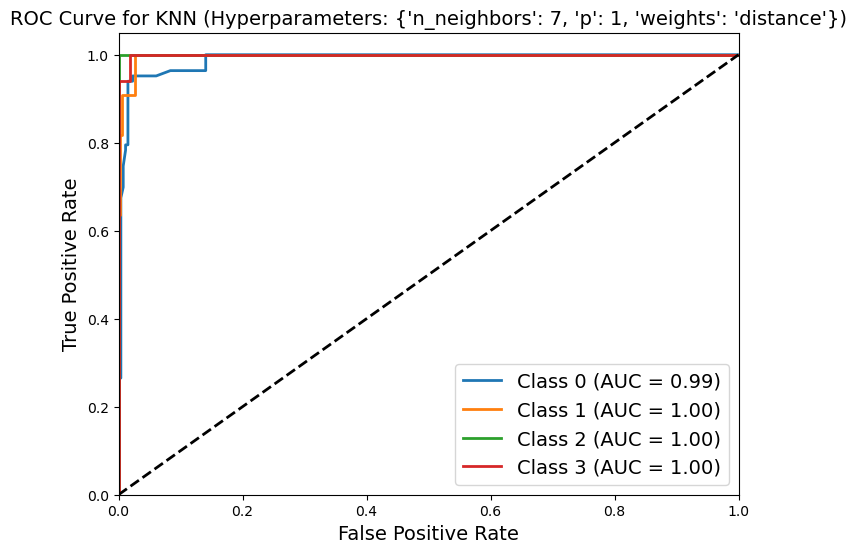

Classification Report for KNN (Hyperparameters: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}):
              precision    recall  f1-score   support

         acc       0.95      0.89      0.92        83
        good       0.91      0.91      0.91        11
       unacc       0.97      1.00      0.98       235
       vgood       0.93      0.76      0.84        17

    accuracy                           0.96       346
   macro avg       0.94      0.89      0.91       346
weighted avg       0.96      0.96      0.96       346



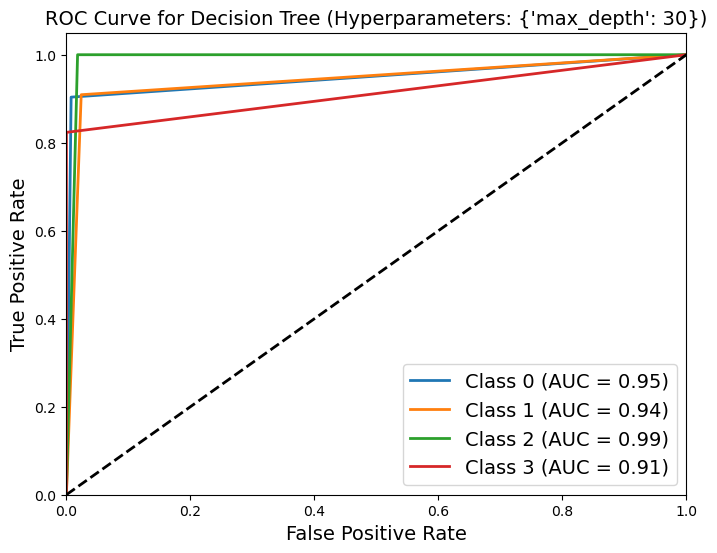

Classification Report for Decision Tree (Hyperparameters: {'max_depth': 30}):
              precision    recall  f1-score   support

         acc       0.97      0.90      0.94        83
        good       0.56      0.91      0.69        11
       unacc       0.99      1.00      1.00       235
       vgood       1.00      0.82      0.90        17

    accuracy                           0.97       346
   macro avg       0.88      0.91      0.88       346
weighted avg       0.97      0.97      0.97       346



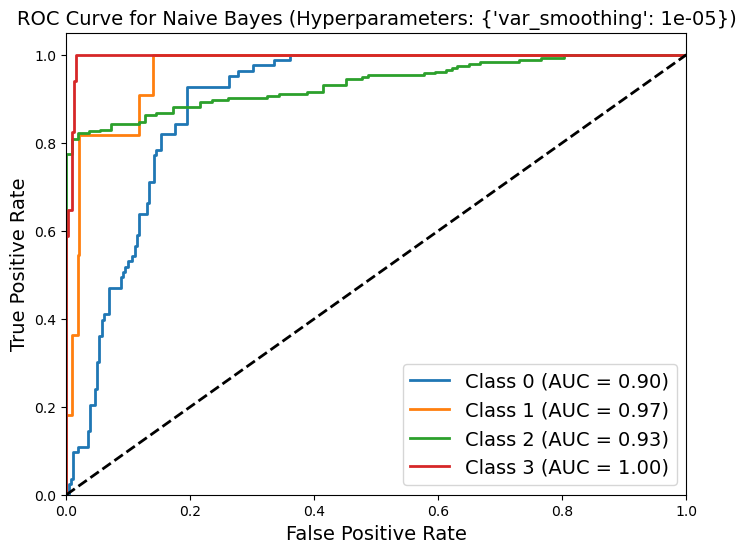

Classification Report for Naive Bayes (Hyperparameters: {'var_smoothing': 1e-05}):
              precision    recall  f1-score   support

         acc       0.64      0.34      0.44        83
        good       0.57      0.36      0.44        11
       unacc       0.84      0.90      0.87       235
       vgood       0.40      1.00      0.57        17

    accuracy                           0.75       346
   macro avg       0.61      0.65      0.58       346
weighted avg       0.76      0.75      0.74       346



/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/lin

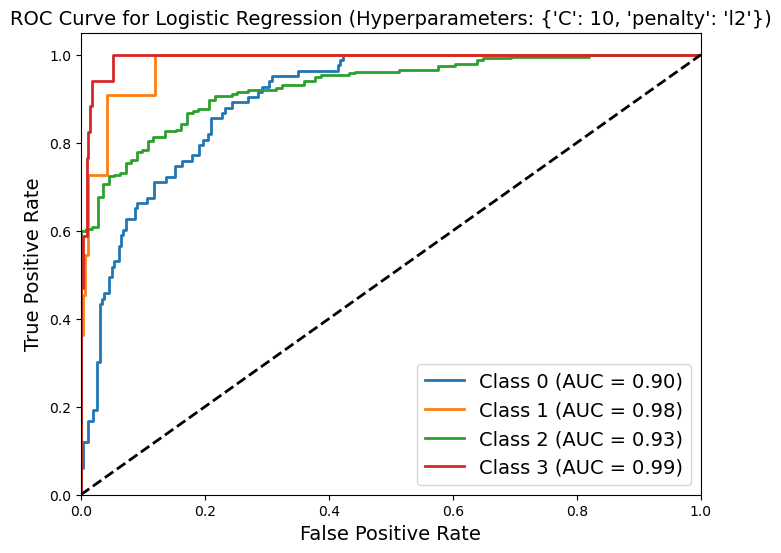

Classification Report for Logistic Regression (Hyperparameters: {'C': 10, 'penalty': 'l2'}):
              precision    recall  f1-score   support

         acc       0.69      0.57      0.62        83
        good       0.71      0.45      0.56        11
       unacc       0.86      0.93      0.89       235
       vgood       0.78      0.82      0.80        17

    accuracy                           0.82       346
   macro avg       0.76      0.69      0.72       346
weighted avg       0.81      0.82      0.81       346



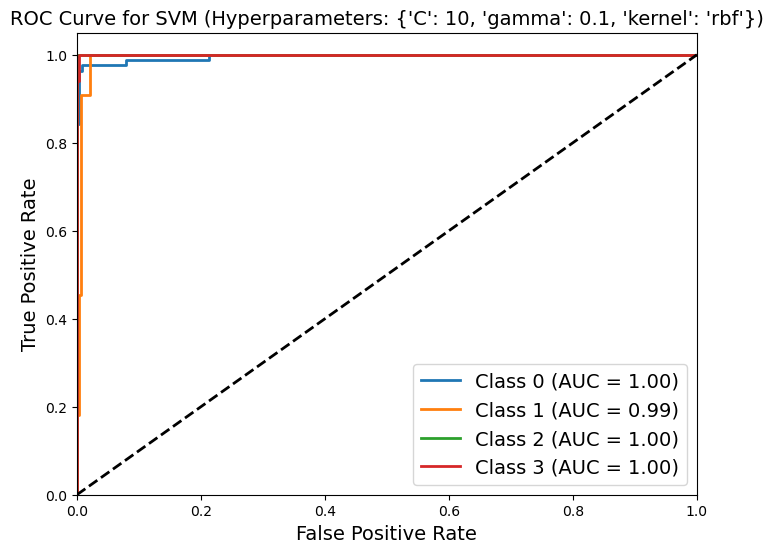

Classification Report for SVM (Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}):
              precision    recall  f1-score   support

         acc       0.99      0.84      0.91        83
        good       0.59      0.91      0.71        11
       unacc       0.98      1.00      0.99       235
       vgood       0.94      0.94      0.94        17

    accuracy                           0.96       346
   macro avg       0.87      0.92      0.89       346
weighted avg       0.96      0.96      0.96       346

{'KNN': 0.9961069429429101, 'Decision Tree': 0.9483414501145443, 'Naive Bayes': 0.9479873254582069, 'Logistic Regression': 0.9499343664759371, 'SVM': 0.9975791628957658}
Best Model: SVM with Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'} (AUC = 1.00)
Classification Report for Best Model:
              precision    recall  f1-score   support

         acc       0.99      0.84      0.91        83
        good       0.59      0.91      0.71        11
       unac

In [150]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np


X = scaler.fit_transform(car_data_numerical_x)
y = car_data_y

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_bin = label_binarize(y_train, classes=np.unique(y))
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Define models and their hyperparameters
models = {
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9],'weights': ['uniform', 'distance'],'p': [1, 2]}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [None, 10, 20, 30]}),
    'Naive Bayes': (GaussianNB(), {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}),
    'Logistic Regression': (LogisticRegression(max_iter=1000), {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}),
    'SVM': (SVC(probability=True), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': [0.01, 0.1, 1]}),
}

# Initialize dictionaries to store best models, hyperparameters, and their performance
best_models = {}
best_hyperparameters = {}
best_auc = {}

# Nested cross-validation loop to find the best model and hyperparameters
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for model_name, (model, params) in models.items():
    inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    grid_search = GridSearchCV(model, params, cv=inner_cv, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_models[model_name] = grid_search.best_estimator_
    best_hyperparameters[model_name] = grid_search.best_params_
    
    # Evaluate the best model on the outer cross-validation loop to estimate its performance
    y_prob = grid_search.best_estimator_.predict_proba(X_test)
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(4):  # Assuming 4 classes
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    best_auc[model_name] = np.mean(list(roc_auc.values()))

    # Plot ROC curve for the current model and hyperparameters
    plt.figure(figsize=(8, 6))
    for i in range(4):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name} (Hyperparameters: {grid_search.best_params_})')
    plt.legend(loc="lower right")
    plt.show()

    # Print classification report for the current model
    y_pred_class = grid_search.best_estimator_.predict(X_test)
    class_report = classification_report(y_test, y_pred_class)
    print(f"Classification Report for {model_name} (Hyperparameters: {grid_search.best_params_}):\n{class_report}")

# Find the best model based on AUC scores
print(best_auc)
best_model_name = max(best_auc, key=lambda k: best_auc[k])
best_model = best_models[best_model_name]
best_hyperparameter = best_hyperparameters[best_model_name]

# Print the best model and its hyperparameters
print(f"Best Model: {best_model_name} with Hyperparameters: {best_hyperparameter} (AUC = {best_auc[best_model_name]:.2f})")

# Evaluate the best model on the test set
y_pred_class = best_model.predict(X_test)
#y_pred_class = np.argmax(y_prob, axis=1)

# Print classification report for the best model
class_report = classification_report(y_test, y_pred_class)
print(f"Classification Report for Best Model:\n{class_report}")


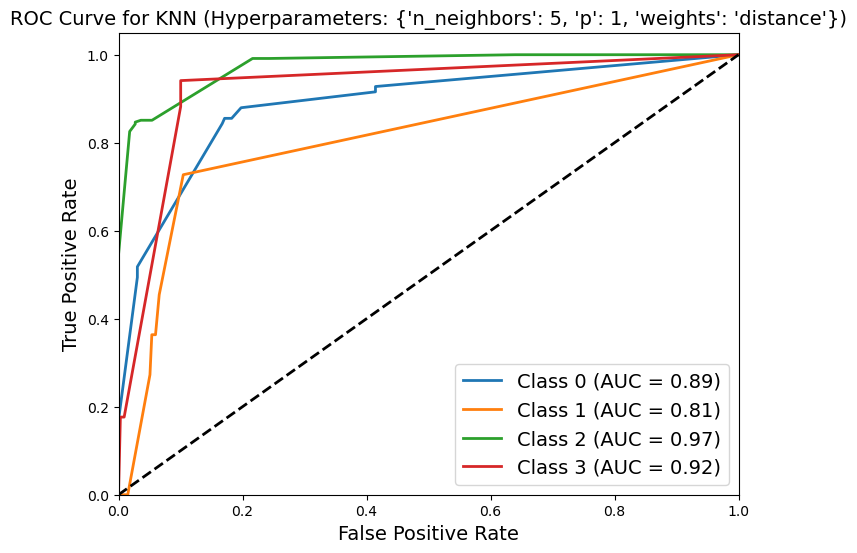

/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

Classification Report for KNN (Hyperparameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}):
              precision    recall  f1-score   support

         acc       0.75      0.61      0.68        83
        good       0.23      0.27      0.25        11
       unacc       0.88      0.99      0.93       235
       vgood       0.00      0.00      0.00        17

    accuracy                           0.83       346
   macro avg       0.47      0.47      0.46       346
weighted avg       0.78      0.83      0.80       346



/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
72 fits failed out of a total of 576.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 969, in fit
    super().fit(
  File "/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 265, in fit
    check_scalar(
  Fi

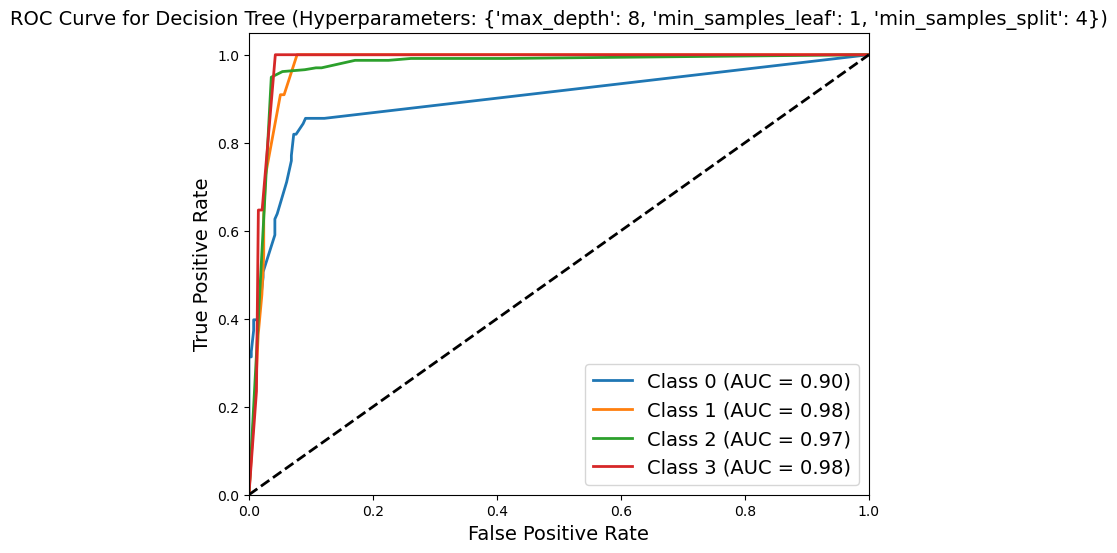

Classification Report for Decision Tree (Hyperparameters: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 4}):
              precision    recall  f1-score   support

         acc       0.82      0.64      0.72        83
        good       0.38      0.45      0.42        11
       unacc       0.92      0.99      0.95       235
       vgood       0.65      0.65      0.65        17

    accuracy                           0.87       346
   macro avg       0.69      0.68      0.68       346
weighted avg       0.87      0.87      0.87       346



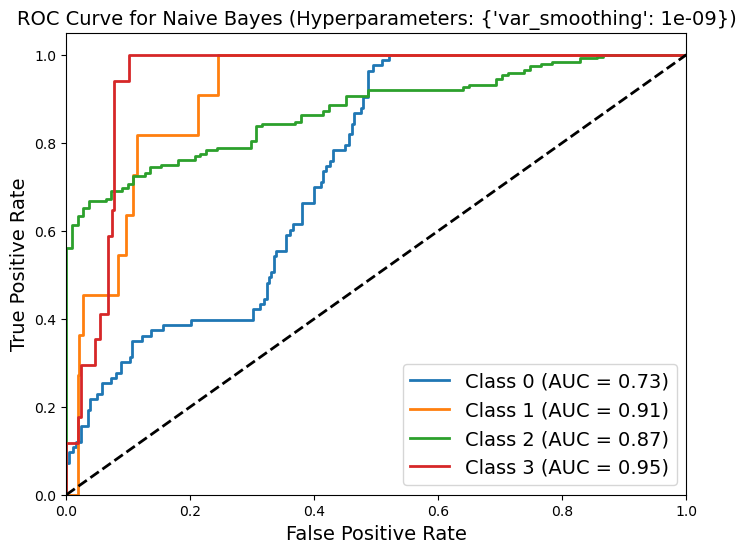

Classification Report for Naive Bayes (Hyperparameters: {'var_smoothing': 1e-09}):
              precision    recall  f1-score   support

         acc       0.30      0.40      0.34        83
        good       0.12      0.82      0.20        11
       unacc       1.00      0.46      0.63       235
       vgood       0.34      1.00      0.51        17

    accuracy                           0.48       346
   macro avg       0.44      0.67      0.42       346
weighted avg       0.77      0.48      0.54       346



/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/lin

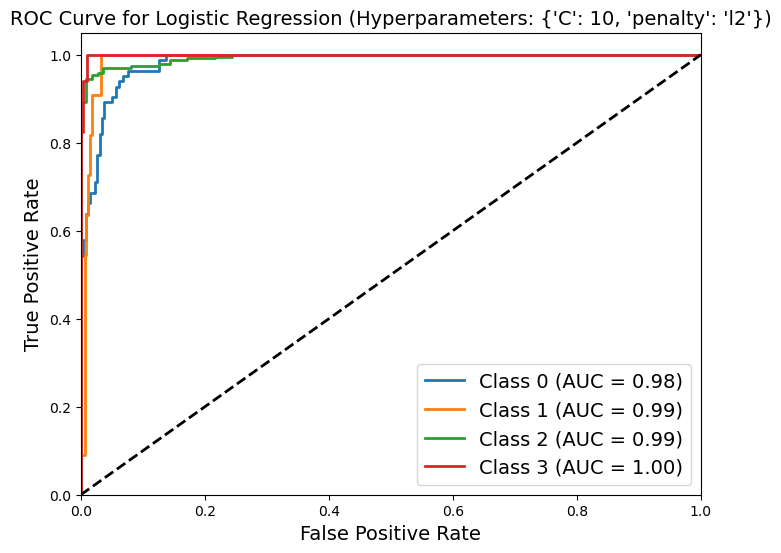

Classification Report for Logistic Regression (Hyperparameters: {'C': 10, 'penalty': 'l2'}):
              precision    recall  f1-score   support

         acc       0.89      0.80      0.84        83
        good       0.59      0.91      0.71        11
       unacc       0.96      0.97      0.97       235
       vgood       0.89      0.94      0.91        17

    accuracy                           0.92       346
   macro avg       0.83      0.90      0.86       346
weighted avg       0.93      0.92      0.93       346



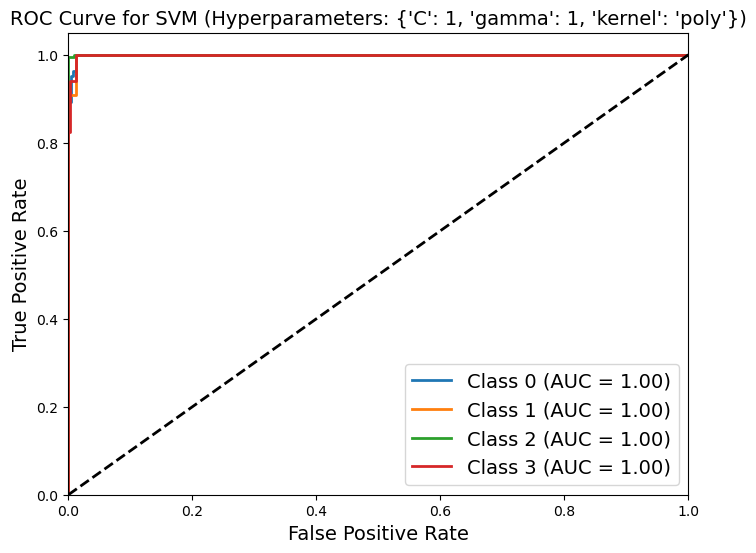

Classification Report for SVM (Hyperparameters: {'C': 1, 'gamma': 1, 'kernel': 'poly'}):
              precision    recall  f1-score   support

         acc       0.95      0.98      0.96        83
        good       0.77      0.91      0.83        11
       unacc       1.00      1.00      1.00       235
       vgood       1.00      0.82      0.90        17

    accuracy                           0.98       346
   macro avg       0.93      0.93      0.92       346
weighted avg       0.98      0.98      0.98       346

{'KNN': 0.898024416109541, 'Decision Tree': 0.9567320727362975, 'Naive Bayes': 0.866353948261386, 'Logistic Regression': 0.991489671602142, 'SVM': 0.9992676106682965}
Best Model: SVM with Hyperparameters: {'C': 1, 'gamma': 1, 'kernel': 'poly'} (AUC = 1.00)
Classification Report for Best Model:
              precision    recall  f1-score   support

         acc       0.95      0.98      0.96        83
        good       0.77      0.91      0.83        11
       unacc      

In [151]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np


categorical_cols = ['buying price', 'maintenance cost', 'number of doors', 'number of persons', 'lug_boot', 'safety'] 
numerical_cols = [col for col in car_data_categorical_x.columns if col not in categorical_cols]

# One-hot encode categorical features
encoded_categorical = pd.get_dummies(car_data_categorical_x[categorical_cols], drop_first=True)

# Combine numerical and encoded categorical features
X = pd.concat([car_data_numerical_x[numerical_cols], encoded_categorical], axis=1)
y = car_data_y

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_bin = label_binarize(y_train, classes=np.unique(y))
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Define models and their hyperparameters
models = {
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9],'weights': ['uniform', 'distance'],'p': [1, 2]}),
    'Decision Tree': (DecisionTreeClassifier(criterion='entropy'), {'max_depth': [1,2,3,4,5,6,7,8], 'min_samples_split': [1,2,3,4,5,6,7,8],
                                                                  'min_samples_leaf': [1,2,4]}),
    'Naive Bayes': (GaussianNB(), {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}),
    'Logistic Regression': (LogisticRegression(max_iter=1000), {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}),
    'SVM': (SVC(probability=True), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': [0.01, 0.1, 1]}),
}

# Initialize dictionaries to store best models, hyperparameters, and their performance
best_models = {}
best_hyperparameters = {}
best_auc = {}

# Nested cross-validation loop to find the best model and hyperparameters
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for model_name, (model, params) in models.items():
    inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    grid_search = GridSearchCV(model, params, cv=inner_cv, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_models[model_name] = grid_search.best_estimator_
    best_hyperparameters[model_name] = grid_search.best_params_
    
    # Evaluate the best model on the outer cross-validation loop to estimate its performance
    y_prob = grid_search.best_estimator_.predict_proba(X_test)
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(4):  # Assuming 4 classes
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    best_auc[model_name] = np.mean(list(roc_auc.values()))

    # Plot ROC curve for the current model and hyperparameters
    plt.figure(figsize=(8, 6))
    for i in range(4):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name} (Hyperparameters: {grid_search.best_params_})')
    plt.legend(loc="lower right")
    plt.show()

    # Print classification report for the current model
    y_pred_class = grid_search.best_estimator_.predict(X_test)
    class_report = classification_report(y_test, y_pred_class)
    print(f"Classification Report for {model_name} (Hyperparameters: {grid_search.best_params_}):\n{class_report}")

# Find the best model based on AUC scores
print(best_auc)
best_model_name = max(best_auc, key=lambda k: best_auc[k])
best_model = best_models[best_model_name]
best_hyperparameter = best_hyperparameters[best_model_name]

# Print the best model and its hyperparameters
print(f"Best Model: {best_model_name} with Hyperparameters: {best_hyperparameter} (AUC = {best_auc[best_model_name]:.2f})")

# Evaluate the best model on the test set
y_pred_class = best_model.predict(X_test)
#y_pred_class = np.argmax(y_prob, axis=1)

# Print classification report for the best model
class_report = classification_report(y_test, y_pred_class)
print(f"Classification Report for Best Model:\n{class_report}")


Classification Report for Class 0:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       402
           1       0.97      1.00      0.98       117

    accuracy                           0.99       519
   macro avg       0.98      1.00      0.99       519
weighted avg       0.99      0.99      0.99       519

Classification Report for Class 1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       499
           1       0.95      1.00      0.98        20

    accuracy                           1.00       519
   macro avg       0.98      1.00      0.99       519
weighted avg       1.00      1.00      1.00       519

Classification Report for Class 2:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       157
           1       1.00      0.99      1.00       362

    accuracy                           1.00       519
   macro avg       0.99

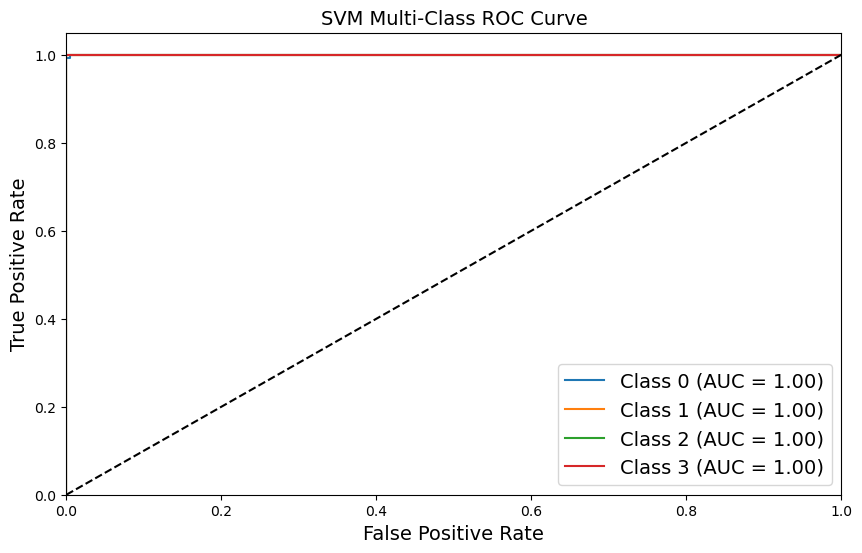

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
import numpy as np

#--------------------------------
categorical_cols = ['buying price', 'maintenance cost', 'number of doors', 'number of persons', 'lug_boot', 'safety'] 
numerical_cols = [col for col in car_data_categorical_x.columns if col not in categorical_cols]

# One-hot encode categorical features
encoded_categorical = pd.get_dummies(car_data_categorical_x[categorical_cols], drop_first=True)

# Combine numerical and encoded categorical features
X = pd.concat([car_data_numerical_x[numerical_cols], encoded_categorical], axis=1)
#---------------------------------
y = car_data_y
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)


# Convert target labels to one-hot encoded format
y_train_bin = label_binarize(y_train, classes=np.unique(y))
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Initialize the SVM classifier for multi-class classification
svm = SVC(probability=True, C=1, gamma=1, kernel='poly')  # 'ovr' for one-vs-rest

# Train the SVM classifier
svm.fit(X_train, y_train)

# Predict probabilities for each class on the test set
y_pred_prob = svm.predict_proba(X_test)


# Print classification report for each class
n_classes = len(np.unique(y))
for i in range(n_classes):
    class_report = classification_report(y_test_bin[:, i], np.round(y_pred_prob[:, i]))
    print(f"Classification Report for Class {i}:\n{class_report}")

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.show()
